In [28]:
from collections import defaultdict
import math
import pandas as pd
import re
from datetime import datetime 
from decimal import Decimal

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print('numpy: ',np.version.version)
print('pandas: ',pd.__version__)
print('matplotlib: ',matplotlib.__version__)
languages = ['en', 'es', 'eu', 'ca', 'pt', 'gl']

numpy:  1.17.2
pandas:  1.0.3
matplotlib:  3.1.1


In [2]:
df = pd.read_csv('../OriginalDataSet/training-tweets.txt', encoding='utf-8', error_bad_lines=False, sep='\t', nrows=10000)
df.columns = ['TweetID', 'UserID', 'Language', "Tweet"]

b'Skipping line 17: expected 4 fields, saw 5\nSkipping line 33: expected 4 fields, saw 5\nSkipping line 44: expected 4 fields, saw 5\nSkipping line 58: expected 4 fields, saw 5\nSkipping line 61: expected 4 fields, saw 5\nSkipping line 64: expected 4 fields, saw 5\nSkipping line 74: expected 4 fields, saw 5\nSkipping line 91: expected 4 fields, saw 5\nSkipping line 99: expected 4 fields, saw 5\nSkipping line 140: expected 4 fields, saw 5\nSkipping line 145: expected 4 fields, saw 5\nSkipping line 148: expected 4 fields, saw 5\nSkipping line 152: expected 4 fields, saw 5\nSkipping line 171: expected 4 fields, saw 5\nSkipping line 178: expected 4 fields, saw 5\nSkipping line 197: expected 4 fields, saw 5\nSkipping line 201: expected 4 fields, saw 5\nSkipping line 203: expected 4 fields, saw 5\nSkipping line 213: expected 4 fields, saw 5\nSkipping line 216: expected 4 fields, saw 5\n'


In [3]:
_df0 = df[['Language', 'Tweet']].copy()
pattern = re.compile('[ ]')
_df0.head()

,Language,Tweet
0,es,Pedazo de tarta k me e kurrao!!!! Ske k buena ...
1,es,No hace falta que te digan que vas a morir par...
2,es,Empieza mi findeeeee :))))
3,es,Próxima parada: Carnaval del Toro de Ciudad Ro...
4,es,Graniza y tal.


In [4]:
for language in languages:
    exec("%sAlphabets={}" % (language))
    exec ('{0}Size = 0'.format(language))

In [5]:
start_time = datetime.now() 
trainDict = defaultdict(list)
for index, row in _df0.iterrows():
    sentence = ''
    tweet = row['Tweet']
    language = row['Language']
    for letter in tweet:
        if letter.isalpha() or pattern.match(letter):
            exec('if \'{0}\' not in {1}Alphabets.keys():\n\
                     {2}Alphabets[letter] = {3}Size\n\
                     {4}Size += 1'.format(letter, language, language, language, language))
            sentence = sentence + letter
    trainDict[row['Language']].append(sentence)
print('Reading time (hh:mm:ss.ms) {}'.format(datetime.now() - start_time ))

Reading time (hh:mm:ss.ms) 0:00:23.759642


In [7]:
print(enSize)
print(enAlphabets)
print(esSize)
print(esAlphabets)
print(euSize)
print(euAlphabets)
print(caSize)
print(caAlphabets)
print(ptSize)
print(ptAlphabets)
print(glSize)
print(glAlphabets)
print(trainDict)

75
{'I': 0, 'M': 1, ' ': 2, 'C': 3, 'O': 4, 'N': 5, 'F': 6, 'U': 7, 'S': 8, 'E': 9, 'D': 10, 'W': 11, 'H': 12, 'A': 13, 'T': 14, 'R': 15, 'L': 16, 'J': 17, 'j': 18, 'u': 19, 's': 20, 't': 21, 'i': 22, 'n': 23, 'b': 24, 'e': 25, 'r': 26, 'a': 27, 'f': 28, 'o': 29, 'd': 30, 'y': 31, 'p': 32, 'h': 33, 'P': 34, 'm': 35, 'l': 36, 'c': 37, 'Q': 38, 'Z': 39, 'B': 40, 'z': 41, 'v': 42, 'g': 43, 'k': 44, 'w': 45, 'Y': 46, 'x': 47, 'K': 48, 'V': 49, 'X': 50, 'q': 51, 'G': 52, 'á': 53, 'ñ': 54, 'Ú': 55, 'í': 56, 'è': 57, 'ó': 58, 'ü': 59, 'é': 60, 'ç': 61, 'ã': 62, 'à': 63, 'ā': 64, 'ò': 65, 'б': 66, 'а': 67, 'р': 68, 'с': 69, 'е': 70, 'л': 71, 'о': 72, 'н': 73, 'É': 74}
88
{'P': 0, 'e': 1, 'd': 2, 'a': 3, 'z': 4, 'o': 5, ' ': 6, 't': 7, 'r': 8, 'k': 9, 'm': 10, 'u': 11, 'S': 12, 'b': 13, 'n': 14, 's': 15, 'y': 16, 'l': 17, 'h': 18, 'g': 19, 'J': 20, 'j': 21, 'p': 22, 'c': 23, 'O': 24, 'L': 25, 'f': 26, 'D': 27, 'X': 28, 'N': 29, 'q': 30, 'i': 31, 'v': 32, 'E': 33, 'ó': 34, 'x': 35, 'C': 36, 'T':

In [8]:
for language in languages:
    exec("%sModel=np.zeros(shape=(%sSize+1))" %(language, language))
#     exec("%sCount=0" %(language))
#     exec("%sEachWordCount=dict.fromkeys(%sAlphabets, 0)" %(language, language)) #needed for bigrams

In [9]:
print('EN',enModel, enModel.shape)
print('ES',esModel, esModel.shape)
print('EU',euModel, euModel.shape)
print('CA',caModel, caModel.shape)
print('PT',ptModel, ptModel.shape)
print('gl',glModel, glModel.shape)

EN [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] (76,)
ES [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (89,)
EU [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (59,)
CA [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] (75,)
PT [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# a = dict.fromkeys(a, 0)

#### For Unigrams

In [10]:
start_time = datetime.now()
delta = 0.5
for language, tweets in trainDict.items():
    for tweet in tweets:
        for i in range(len(tweet)-1):
            first = tweet[i]
            exec('index = %sAlphabets[first]'%(language)) #index = esAlphabets[first] #get index of the character from the language dictionary
#             exec('np.add.at(%sModel, [index], 1)'%(language)) #np.add.at(esModel, [index], 1) #increment that index in the language model
            exec('%sModel[index] += 1'%(language))
for language in languages:
    exec('%sModel = np.add(%sModel, delta)'%(language, language)) #this is where smoothing happens
    exec('%sModel = %sModel/%sModel.sum()'%(language, language, language)) #divide all the values by the sum of the row
    exec('%sModel = np.log10(%sModel)'%(language, language))
print('Training time (hh:mm:ss.ms) {}'.format(datetime.now() - start_time ))

Training time (hh:mm:ss.ms) 0:00:21.351025


In [30]:
print('EN',enModel, enModel.shape)
print('ES',esModel, esModel.shape)
print('EU',euModel, euModel.shape)
print('CA',caModel, caModel.shape)
print('PT',ptModel, ptModel.shape)
print('gl',glModel, glModel.shape)

EN [-1.92880387 -2.19719365 -0.80677614 -2.41560339 -2.24237608 -2.32139316
 -2.43563205 -2.48438912 -1.98040527 -2.02982095 -2.46204106 -2.35410844
 -2.34154965 -2.12509851 -2.03794834 -2.28913814 -2.14694633 -2.35198993
 -2.22784442 -1.60165611 -1.37935697 -1.19080415 -1.30620074 -1.3574127
 -1.7346171  -1.08313648 -1.41279873 -1.1962329  -1.94588507 -1.22052269
 -1.70172259 -1.73974763 -1.75873621 -1.52350879 -2.31747174 -1.72204983
 -1.47742206 -1.68095003 -3.1664912  -3.10250889 -2.38037102 -2.33540387
 -2.11396215 -1.87982804 -2.01400871 -1.928007   -2.62538763 -2.65407789
 -2.76993209 -2.50794985 -2.9127533  -2.72778564 -2.47028741 -3.73538283
 -3.85188839 -4.48871049 -3.60410391 -4.12073371 -3.64361245 -4.48871049
 -3.68707815 -4.12073371 -4.12073371 -4.26686174 -4.48871049 -4.12073371
 -4.48871049 -4.26686174 -4.48871049 -4.48871049 -4.48871049 -4.48871049
 -4.48871049 -4.48871049 -4.48871049 -4.96583175] (76,)
ES [-2.42018365 -1.01975997 -1.50652523 -1.00170994 -2.37720093 -1

In [ ]:
# glSum = glModel.sum()
# ptSum = ptModel.sum()
# caSum = caModel.sum()
# euSum = euModel.sum()
# esSum = esModel.sum()
# enSum = enModel.sum()

In [ ]:
# print('enSum', enSum ,'\nesSum', esSum ,'\neuSum', euSum ,'\ncaSum', caSum ,'\nptSum', ptSum, '\nglSum', glSum)

x:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
y:
 [-1.92880387 -2.19719365 -0.80677614 -2.41560339 -2.24237608 -2.32139316
 -2.43563205 -2.48438912 -1.98040527 -2.02982095 -2.46204106 -2.35410844
 -2.34154965 -2.12509851 -2.03794834 -2.28913814 -2.14694633 -2.35198993
 -2.22784442 -1.60165611 -1.37935697 -1.19080415 -1.30620074 -1.3574127
 -1.7346171  -1.08313648 -1.41279873 -1.1962329  -1.94588507 -1.22052269
 -1.70172259 -1.73974763 -1.75873621 -1.52350879 -2.31747174 -1.72204983
 -1.47742206 -1.68095003 -3.1664912  -3.10250889 -2.38037102 -2.33540387
 -2.11396215 -1.87982804 -2.01400871 -1.928007   -2.62538763 -2.65407789
 -2.76993209 -2.50794985 -2.9127533  -2.72778564 -2.47028741 -3.73538283
 -3.85188839 -4.48871049 -3.60410391 -4.12073371 -3.64361245 -4.48871049
 -3.68707815 -4.12073371 -4.12

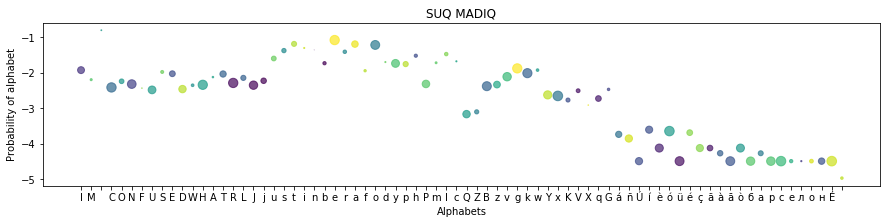

In [35]:
# print(enAlphabets.values())
# print(enModel)
# print(type(list(enAlphabets.values())))
# npa = np.asarray(someListOfLists, dtype=np.float32)
x = np.asarray(list(enAlphabets.values()))
x = np.append(x, (x.shape[0]))
y = enModel
print('x:\n', x)
print('y:\n', y)

fig = plt.figure()
fig.set_size_inches(15, 3)
area = (10 * np.random.rand(x.shape[0]))**2
colors = np.random.rand(x.shape[0])
plt.title('SUQ MADIQ')
plt.xlabel('Alphabets')
plt.ylabel('Probability of alphabet')
plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.xticks(x, list(enAlphabets.keys()))
plt.tick_params(axis='x', which='minor', labelsize=10, width = 5)
# plt.grid()
# plt.show()

In [31]:
df = pd.read_csv('../OriginalDataSet/test-tweets-given.txt', encoding='utf-8', error_bad_lines=False, sep='\t', nrows=100)
df.columns = ['TweetID', 'UserID', 'Language', "Tweet"]
_df0 = df[['TweetID', 'Language', 'Tweet']].copy()
# pattern = re.compile('[a-z ]')
_df0.head()

,TweetID,Language,Tweet
0,439381946939232257,es,Foto antes de LA FOTO. #orla @ Universidad de ...
1,439389330533273600,es,@Nagore_Robles Que mal lo vas a pasar viendo a...
2,439392779786285056,es,"Hay cosas complicadas, y luego está quitarse l..."
3,439393603845373952,es,"Me duele todo, que asco."
4,439395306464346112,eu,Ta aste txuriyakin hastekoo bizitzako parriaak...


In [33]:
probability = {}
for index, row in _df0.iterrows():
    for language in languages:
        exec("%sProb=math.log10(1/6)" % (language))
    tweetID = row['TweetID']
    langTweet = row['Language']
    tweet = row['Tweet']
    
    for i in range(len(tweet)-2):
        first = tweet[i]
        for lang in languages:
            exec('if (first not in {0}Alphabets.keys()):\n\
    prob = {1}Model[-1]\n\
else:\n\
    index = {2}Alphabets[first]\n\
    prob = {3}Model[index]\n\
{4}Prob = prob + {5}Prob\n'.format(lang, lang, lang, lang, lang, lang)) #, lang, lang, lang, lang, lang, lang, lang, lang, lang))
    for langu in languages:
        exec("probability['%s'] = %sProb"%(langu, langu))
#     probability[lang] = enProb
#     print(probability)
#     print('tweet: ', tweet,'\nenProb:', enProb, '\neuProb:', euProb, '\nesProb:', esProb, '\ncaProb:', caProb
#     ,'\nptProb:', ptProb, '\nglProb:', glProb)
    result = max(probability, key=probability.get)
    print(tweetID, '  ', result, '  ', '%.2E' % Decimal(probability[result]), '  ', langTweet, 'correct' if (langTweet==result) else 'wrong')

439381946939232257    gl    -1.11E+02    es wrong
439389330533273600    gl    -1.81E+02    es wrong
439392779786285056    gl    -9.44E+01    es wrong
439393603845373952    gl    -3.03E+01    es wrong
439395306464346112    eu    -6.84E+01    eu correct
439403680245493760    gl    -3.02E+01    es wrong
439407703358967808    gl    -1.77E+02    es wrong
439408603167211520    gl    -1.20E+02    es wrong
439410377286492160    gl    -1.36E+02    es wrong
439411327971643392    gl    -1.76E+02    es wrong
439414230413217792    gl    -1.60E+02    es wrong
439415113045778432    gl    -3.43E+01    eu wrong
439420783698640896    gl    -3.56E+01    es wrong
439428207222484992    gl    -3.06E+01    es wrong
439435803983634432    gl    -8.36E+01    es wrong
439437804352057344    gl    -4.99E+01    es wrong
439438406117232640    gl    -9.05E+01    es wrong
439449097658195968    gl    -1.86E+02    es wrong
439455534304210944    gl    -7.85E+01    eu wrong
439460634212970496    gl    -6.24E+01    es wron

In [26]:
str = 'if (first not in {0}Alphabets.keys():\n\
    prob = {1}Model[-1]\n\
else:\n\
    index = {2}Alphabets[first]\n\
    prob = {3}Model[index]\n\
{4}Prob = prob + {5}Prob\n'
print(str)

if (first not in {0}Alphabets.keys():
    prob = {1}Model[-1]
else:
    index = {2}Alphabets[first]
    prob = {3}Model[index]
{4}Prob = prob + {5}Prob

